In [ ]:
#analysis

=== ADVANCED DROUGHT ANALYSIS ===
Loading and preprocessing data...
Successfully loaded data from 2020-01-01 to 2022-12-27

=== DROUGHT REGIME CLUSTERING ===


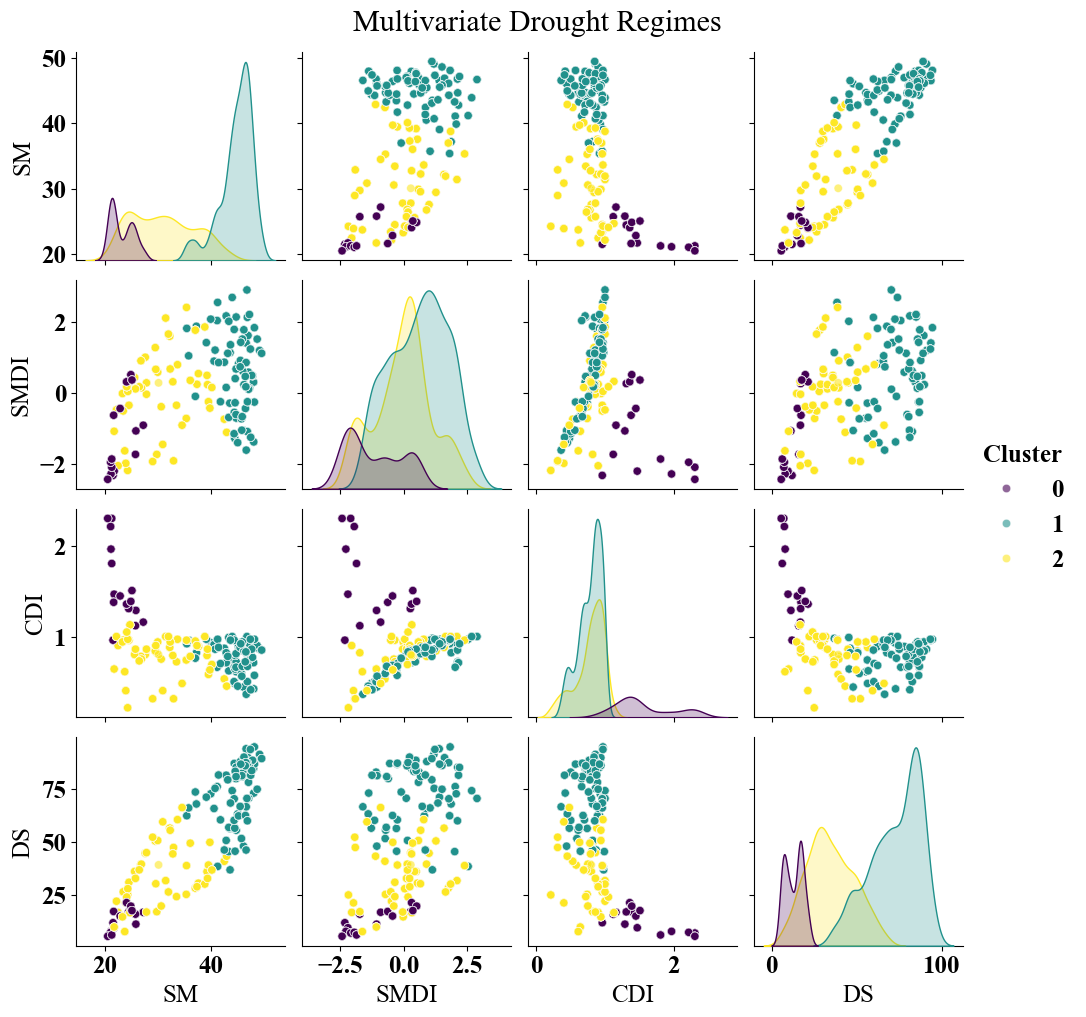


Analysis complete!


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.tsa.seasonal import STL
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
# Set the font to Times New Roman and default font weight to bold
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 18  # Set default font size

def load_and_preprocess():
    """Enhanced data loading with automatic quality checks"""
    print("Loading and preprocessing data...")
    try:
        data_dict = {
            'Rainfall': pd.read_csv('Rainfall.csv'),
            'SM': pd.read_csv('SM.csv'),
            'SMDI': pd.read_csv('SMDI.csv'), 
            'CDI': pd.read_csv('CDI.csv'),
            'DS': pd.read_csv('DS.csv')
        }
        
        processed = []
        for name, df in data_dict.items():
            # Flexible date handling
            date_col = next((c for c in df.columns if c.lower() in ['date','time']), None)
            if not date_col:
                print(f"Skipping {name}: No date column found")
                continue
                
            df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
            df = df.dropna(subset=[date_col]).set_index(date_col)
            
            # Select first numeric column if multiple exist
            num_cols = df.select_dtypes(include=np.number).columns
            if len(num_cols) == 0:
                print(f"Skipping {name}: No numeric data")
                continue
                
            ts = df[num_cols[0]].rename(name)
            processed.append(ts.resample('D').mean().ffill())
        
        if not processed:
            raise ValueError("No valid data loaded")
            
        merged = pd.concat(processed, axis=1).dropna()
        print(f"Successfully loaded data from {merged.index.min().date()} to {merged.index.max().date()}")
        return merged
        
    except Exception as e:
        print(f"Data loading failed: {str(e)}")
        return None

def advanced_drought_analysis(df):
    """Comprehensive drought characterization with multiple techniques"""
    if df is None:
        return
    
   
    # 2. Multivariate Clustering
    print("\n=== DROUGHT REGIME CLUSTERING ===")
    drought_vars = [c for c in df.columns if c != 'Rainfall']
    if len(drought_vars) >= 2:
        scaler = StandardScaler()
        X = scaler.fit_transform(df[drought_vars])
        
        # Optimal cluster number via elbow method
        distortions = []
        for k in range(1,6):
            kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
            distortions.append(kmeans.inertia_)
            
              
        # Apply clustering
        kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
        df['Cluster'] = kmeans.labels_
        
        # Visualize clusters
        sns.pairplot(df, vars=drought_vars, hue='Cluster', 
                    palette='viridis', plot_kws={'alpha':0.6})
        plt.suptitle('Multivariate Drought Regimes', y=1.02)
        plt.savefig(r'C:\Users\ketsa\OneDrive\Documents\paper7_drougth\Wavelet\image\Multivariate Drought Regimes.png', dpi=330)
        plt.show()
    
       
def run_analysis():
    """Execute the complete analysis pipeline"""
    print("=== ADVANCED DROUGHT ANALYSIS ===")
    
    df = load_and_preprocess()
    if df is None:
        return
    
    advanced_drought_analysis(df)
    
    print("\nAnalysis complete!")

if __name__ == "__main__":
    run_analysis()